In [1]:
import pandas as pd

# Dataset: Walmart Sales Data

## 1. Total sale units by date

Firstly, we want to look at the total sales in each day. To do it, we use the combination of **calendar.csv** and **sales_train_validation.csv** files to extract the information about date and sales for each day. The total sales below are in unit, not accounting for prices.

In [2]:
calendar_data = pd.read_csv('../data/raw/walmart_sales_data/calendar.csv')
calendar_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
calendar_data.isna().sum() 

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [4]:
evaluation_data = pd.read_csv('../data/raw/walmart_sales_data/sales_train_validation.csv')
evaluation_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [5]:
evaluation_data.isna().sum() 

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [6]:
for index, row in calendar_data.iterrows():
    if row["d"] not in evaluation_data:
        continue
    total_sales = evaluation_data[row["d"]].sum()
    calendar_data.loc[index, "total_sales"] = total_sales
calendar_data.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,total_sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,32631.0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,31749.0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,23783.0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,25412.0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,19146.0


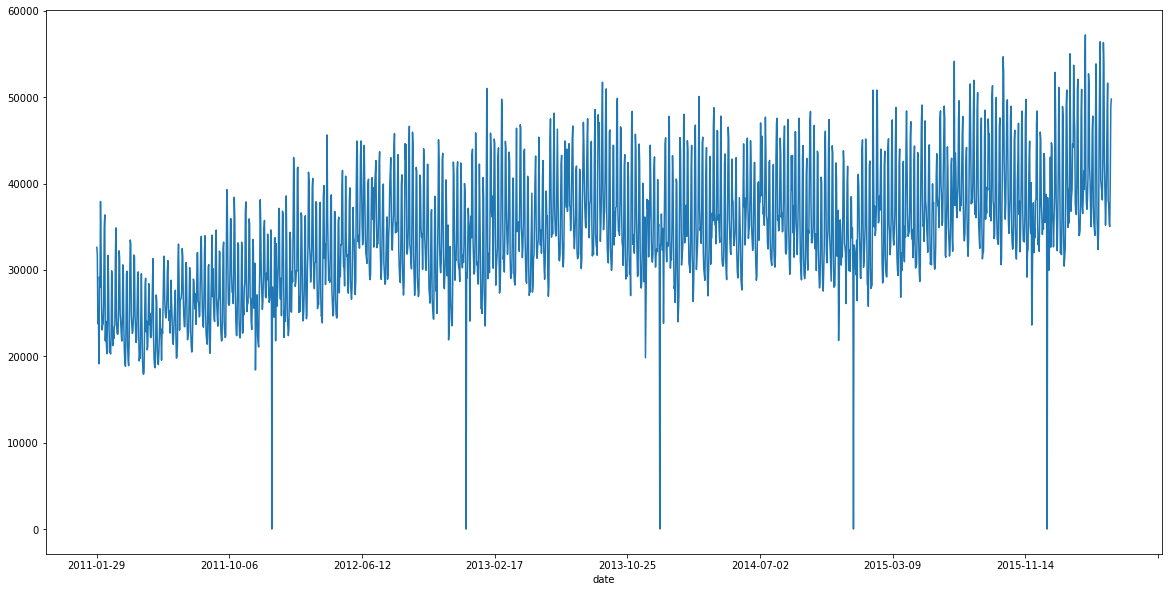

In [7]:
calendar_data.set_index('date').total_sales.plot(figsize=(20, 10))

**Takeaway**: The overall sales increase through time. There is a sudden drop in one period each year. To examine it, we will take a look at the lowest value in sales.

In [8]:
calendar_data.nsmallest(n=5, columns=['total_sales'])

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,total_sales
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0,11.0
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0,13.0
1791,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0,14.0
1061,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0,20.0
1426,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0,20.0


**Takeaway**: So we see that Chrismas days have the lowest sales among all. Next, we want to take a look at sales in different state, specifically CA, TX, WI.

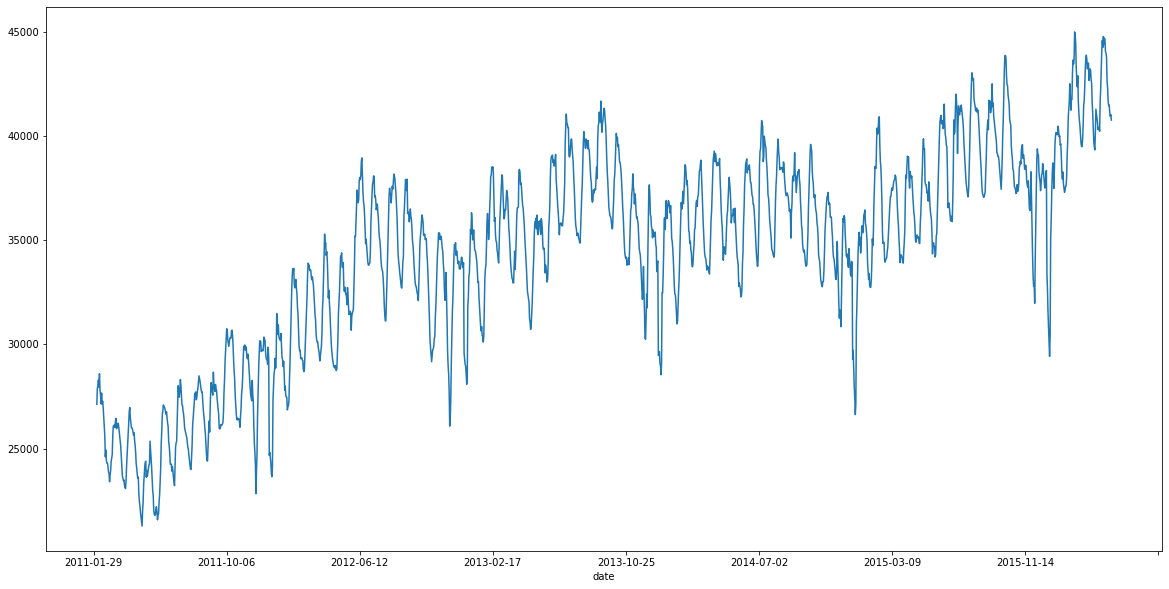

In [9]:
calendar_data["total_sales_7d_avr"] = calendar_data["total_sales"].rolling(window=7).mean()
calendar_data.set_index('date').total_sales_7d_avr.plot(figsize=(20, 10))

### 1.1 Sales by states and by categories

In [10]:
calendar_processed_data = pd.read_csv('../data/processed/calendar_processed-May-13-2022.csv')
calendar_processed_data.head()

,Unnamed: 0,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,...,total_sales_CA_HOBBIES,total_sales_TX_HOBBIES,total_sales_WI_HOBBIES,total_sales_CA_HOUSEHOLD,total_sales_TX_HOUSEHOLD,total_sales_WI_HOUSEHOLD,total_sales_CA_FOODS,total_sales_TX_FOODS,total_sales_WI_FOODS,total_sales
0,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,...,1802.0,879.0,1083.0,2292.0,1706.0,1691.0,6853.0,6853.0,6224.0,32631.0
1,1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,...,1561.0,870.0,926.0,2382.0,1730.0,1522.0,7030.0,7030.0,5866.0,31749.0
2,2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,...,1472.0,526.0,684.0,1692.0,1128.0,1107.0,5124.0,5124.0,5106.0,23783.0
3,3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,...,1405.0,809.0,455.0,1778.0,1102.0,985.0,5470.0,5470.0,5544.0,25412.0
4,4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,...,1181.0,501.0,132.0,1566.0,809.0,354.0,4602.0,4602.0,2823.0,19146.0


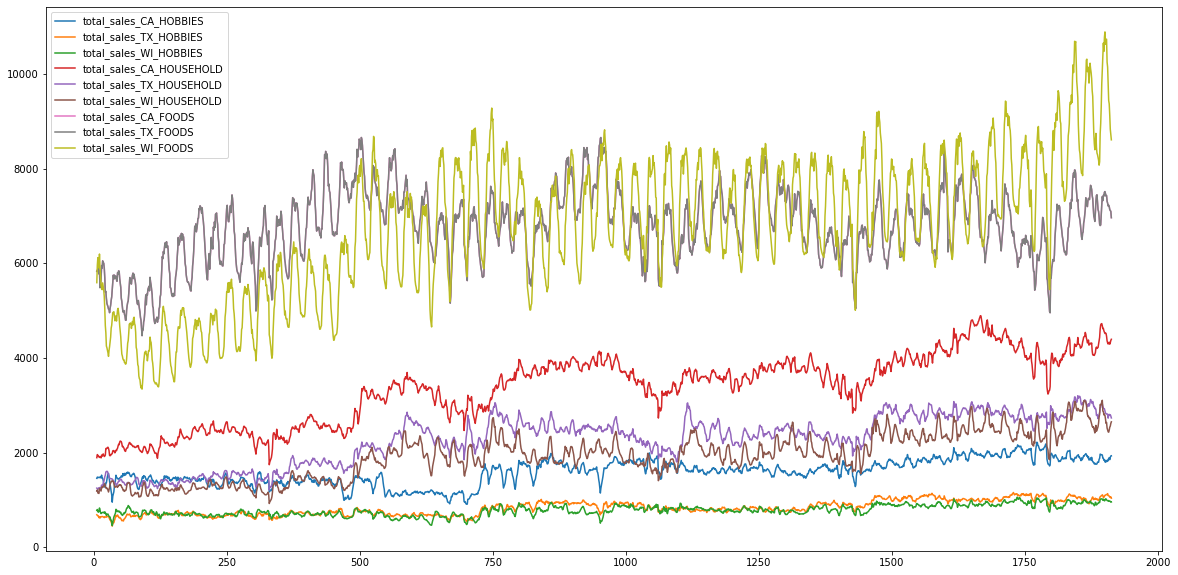

In [11]:
calendar_processed_data[["total_sales_CA_HOBBIES", "total_sales_TX_HOBBIES", "total_sales_WI_HOBBIES",
                         "total_sales_CA_HOUSEHOLD", "total_sales_TX_HOUSEHOLD", "total_sales_WI_HOUSEHOLD",
                         "total_sales_CA_FOODS", "total_sales_TX_FOODS", "total_sales_WI_FOODS"]].rolling(window=7).mean().plot(figsize=(20, 10))

In [12]:
calendar_processed_data[["total_sales_CA_HOBBIES", "total_sales_TX_HOBBIES", "total_sales_WI_HOBBIES",
                         "total_sales_CA_HOUSEHOLD", "total_sales_TX_HOUSEHOLD", "total_sales_WI_HOUSEHOLD",
                         "total_sales_CA_FOODS", "total_sales_TX_FOODS", "total_sales_WI_FOODS"]].rolling(window=7).mean().head(15)

,total_sales_CA_HOBBIES,total_sales_TX_HOBBIES,total_sales_WI_HOBBIES,total_sales_CA_HOUSEHOLD,total_sales_TX_HOUSEHOLD,total_sales_WI_HOUSEHOLD,total_sales_CA_FOODS,total_sales_TX_FOODS,total_sales_WI_FOODS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1456.285714,686.571429,778.571429,1892.714286,1249.714286,1188.714286,5831.000000,5831.000000,5592.428571
7,1482.571429,673.142857,797.428571,1958.714286,1234.571429,1210.142857,5859.857143,5859.857143,5964.142857
8,1471.285714,662.285714,754.142857,1938.000000,1224.857143,1146.428571,5844.142857,5844.142857,6121.142857
9,1476.428571,662.000000,739.714286,1935.857143,1248.000000,1143.857143,5898.571429,5898.571429,6071.571429


## 2. Total sales with prices by date

Firstly, we need to translate the sales of **sales_train_validation.csv** file that accomodates for the price in **sell_prices.csv** file. But, we get the problem that the prices change weekly and they are different between stores. There are six stores in total.

In [13]:
stores = evaluation_data['store_id'].unique()
print('Stores', stores)

Stores ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


Below shows how prices change every week in a 4 different stores in CA. 

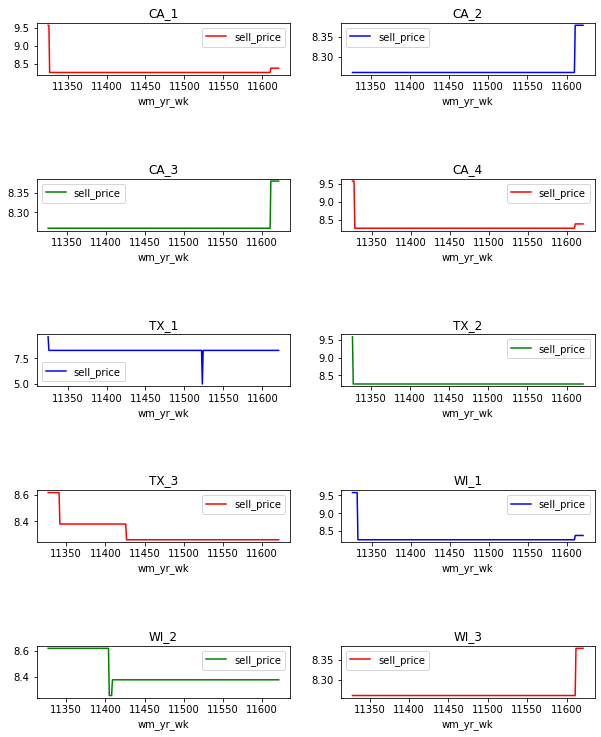

In [14]:
import matplotlib.pyplot as plt
sell_prices_data = pd.read_csv('../data/raw/walmart_sales_data/sell_prices.csv')
fig, axes = plt.subplots(nrows=5, ncols=2)
plt.subplots_adjust(top=2, hspace=2)
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0,0], color="r", title="CA_1")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_2")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0,1], color="b", title="CA_2")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_3")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1,0], color="g", title="CA_3")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_4")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1,1], color="r", title="CA_4")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "TX_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[2,0], color="b", title="TX_1")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "TX_2")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[2,1], color="g", title="TX_2")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "TX_3")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[3,0], color="r", title="TX_3")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "WI_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[3,1], color="b", title="WI_1")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "WI_2")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[4,0], color="g", title="WI_2")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "WI_3")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[4,1], color="r", title="WI_3")

Although the problem seems complicated, we can tackle this by delicately translate prices and sales from **calendar.csv**, **sales_train_validation.csv** and **sell_prices.csv** files. But this process took alot of time so we did complete it.

In [15]:
# evaluation_with_prices_data = evaluation_data.copy()
# for e_index, e_row in evaluation_with_prices_data.iterrows():
#     store_id = e_row["store_id"]
#     item_id = e_row["item_id"]
#     for c_index, c_row in calendar_data.iterrows():
#         d = c_row["d"]
#         wm_yr_wk = c_row["wm_yr_wk"]
#         sell_price = sell_prices_data[(sell_prices_data['store_id'] == store_id) & (sell_prices_data['item_id'] == item_id) & (sell_prices_data['wm_yr_wk'] == wm_yr_wk)]
#         if sell_price.empty:
#             continue
#         evaluation_with_prices_data.loc[e_index, d] = evaluation_with_prices_data.loc[e_index, d]*sell_price

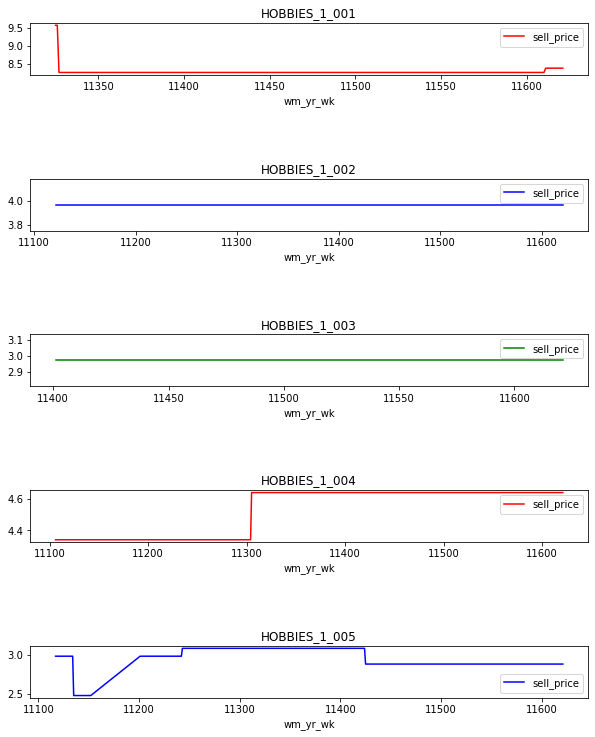

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=1)
plt.subplots_adjust(top=2, hspace=2)

sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_001") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0], color="r", title="HOBBIES_1_001")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_002") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1], color="b", title="HOBBIES_1_002")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_003") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[2], color="g", title="HOBBIES_1_003")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_004") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[3], color="r", title="HOBBIES_1_004")
sell_prices_data[(sell_prices_data["item_id"] == "HOBBIES_1_005") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[4], color="b", title="HOBBIES_1_005")

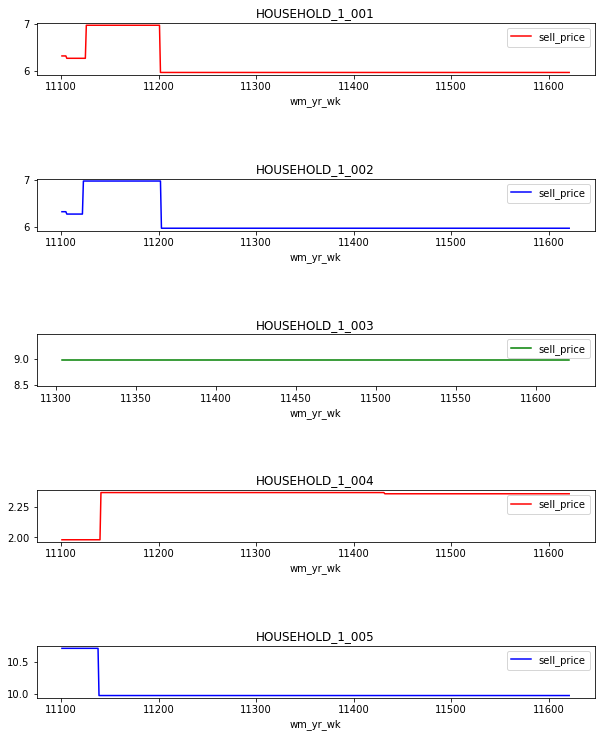

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=1)
plt.subplots_adjust(top=2, hspace=2)

sell_prices_data[(sell_prices_data["item_id"] == "HOUSEHOLD_1_001") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0], color="r", title="HOUSEHOLD_1_001")
sell_prices_data[(sell_prices_data["item_id"] == "HOUSEHOLD_1_002") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1], color="b", title="HOUSEHOLD_1_002")
sell_prices_data[(sell_prices_data["item_id"] == "HOUSEHOLD_1_003") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[2], color="g", title="HOUSEHOLD_1_003")
sell_prices_data[(sell_prices_data["item_id"] == "HOUSEHOLD_1_004") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[3], color="r", title="HOUSEHOLD_1_004")
sell_prices_data[(sell_prices_data["item_id"] == "HOUSEHOLD_1_005") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[4], color="b", title="HOUSEHOLD_1_005")

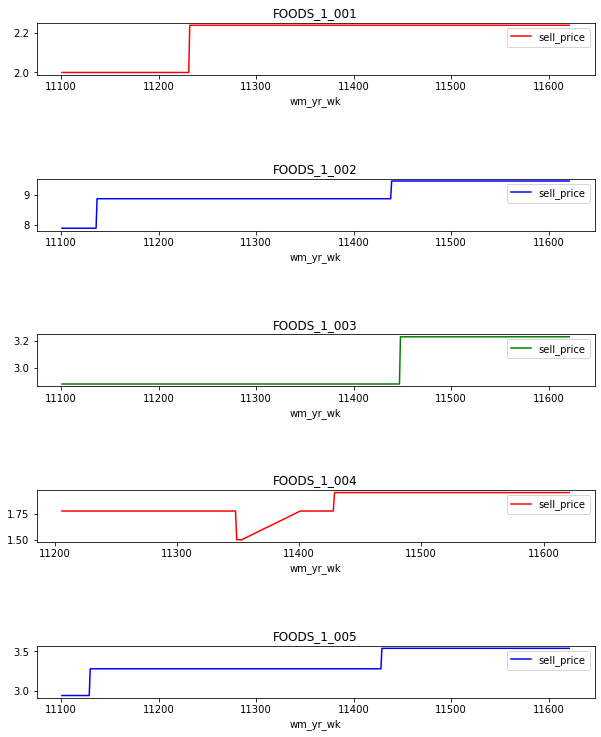

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=1)
plt.subplots_adjust(top=2, hspace=2)

sell_prices_data[(sell_prices_data["item_id"] == "FOODS_1_001") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[0], color="r", title="FOODS_1_001")
sell_prices_data[(sell_prices_data["item_id"] == "FOODS_1_002") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[1], color="b", title="FOODS_1_002")
sell_prices_data[(sell_prices_data["item_id"] == "FOODS_1_003") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[2], color="g", title="FOODS_1_003")
sell_prices_data[(sell_prices_data["item_id"] == "FOODS_1_004") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[3], color="r", title="FOODS_1_004")
sell_prices_data[(sell_prices_data["item_id"] == "FOODS_1_005") & (sell_prices_data["store_id"] == "CA_1")].set_index('wm_yr_wk').plot(y="sell_price", figsize=(10, 5), ax=axes[4], color="b", title="FOODS_1_005")

## 3. Total sales by weekdays

Next, we want to see how the business performed during the week by plotting the sales by weekday.

In [ ]:
weekdays = calendar_data['weekday'].unique()
print('Weekdays', weekdays)

In [ ]:
calendar_processed_data.groupby(['weekday']).sum().sort_values(by=['total_sales']).plot(kind='bar', y='total_sales', figsize=(20, 10))

We can clearly see that weekends have the highest sale maybe because people were off from work. Also Wednesday has the least sales maybe because it is the middle of the week.

## 4. Total sales by events

Next, we want to see how the business performed during the holidays.

In [ ]:
event_name_1 = calendar_data['event_name_1'].unique()
print('Events', event_name_1)

In [ ]:
calendar_processed_data.groupby(['event_name_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y='total_sales', figsize=(20, 10))

**Takeaway**: Sales perform best durring the SuperBowl and worst during Christmas

In [ ]:
event_type_1 = calendar_data['event_type_1'].unique()
print('Event types', event_type_1)

In [ ]:
calendar_processed_data.groupby(['event_type_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y='total_sales', figsize=(20, 10))

**Takeaway**: However, sales perform worst in sports events and best in religous events.

### 4. 1. With categories

In [ ]:
calendar_processed_data.groupby(['event_name_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y=["total_sales_CA_HOBBIES", "total_sales_TX_HOBBIES", "total_sales_WI_HOBBIES",
                         "total_sales_CA_HOUSEHOLD", "total_sales_TX_HOUSEHOLD", "total_sales_WI_HOUSEHOLD",
                         "total_sales_CA_FOODS", "total_sales_TX_FOODS", "total_sales_WI_FOODS"], stacked=True, figsize=(20, 10))

In [ ]:
calendar_processed_data.groupby(['event_type_1']).sum().sort_values(by=['total_sales']).plot(kind='bar', y=["total_sales_CA_HOBBIES", "total_sales_TX_HOBBIES", "total_sales_WI_HOBBIES",
                         "total_sales_CA_HOUSEHOLD", "total_sales_TX_HOUSEHOLD", "total_sales_WI_HOUSEHOLD",
                         "total_sales_CA_FOODS", "total_sales_TX_FOODS", "total_sales_WI_FOODS"], stacked=True, figsize=(20, 10))

**Takeaway**: We see a large increase in food sales during the SuperBowl.

## 5. Total sales by months

In [ ]:
calendar_processed_data.groupby(['month']).sum().plot(kind='bar', y='total_sales', figsize=(20, 10))

**Takeaway**: From the plot we might can say that sales is good during the Spring. But in the end of the year, on November and December, it is low.

### 5. 1. With categories

In [ ]:
calendar_processed_data.groupby(['month']).sum().plot(kind='bar', y=["total_sales_CA_HOBBIES", "total_sales_TX_HOBBIES", "total_sales_WI_HOBBIES",
                         "total_sales_CA_HOUSEHOLD", "total_sales_TX_HOUSEHOLD", "total_sales_WI_HOUSEHOLD",
                         "total_sales_CA_FOODS", "total_sales_TX_FOODS", "total_sales_WI_FOODS"], stacked=True, figsize=(20, 10))

In [ ]:
calendar_processed_data["total_sales"].isna().sum() 